### 행정구역정보(csv)를 읽고, 분석하기
* read_csv() 함수로 csv 읽어오기
* head(), tail(), info()
* 특정행과 특정열을 선택하기 loc[], iloc[] 사용
* 컬럼명 변경
* 상관관계 분석
* 시각화

In [1]:
!pip show pandas

Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\vega2\anaconda3\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: statsmodels, seaborn


In [2]:
import pandas as pd

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [3]:
data.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [4]:
data.tail(4)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [5]:
print(data.columns)
print(data.index)
print(data.values)

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
RangeIndex(start=0, stop=229, step=1)
[[0 202520 '강릉' ... 1040.07 '강원도' '강릉시']
 [1 25589 '고성(강원)' ... 664.19 '강원도' '고성군']
 [2 86747 '동해' ... 180.01 '강원도' '동해시']
 ...
 [226 62809 '진천' ... 406.08 '충청북도' '진천군']
 [227 790216 '청주' ... 932.51 '충청북도' '청주시']
 [228 198077 '충주' ... 983.7 '충청북도' '충주시']]


In [6]:
print(type(data.values))

<class 'numpy.ndarray'>


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [8]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [9]:
# 인구수 컬럼의 집계함수
print('max ', data['인구수'].max())
print('max ', data['인구수'].min())
print('max ', data['인구수'].median())

max  1125461
max  8392
max  140159.0


In [10]:
# unique 한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [11]:
# row count
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
경상남도       18
강원도        18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
울산광역시       5
대전광역시       5
광주광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [12]:
# 서울특별시의 인구수의 평균과 표준편차
data.loc[data['광역시도'] == '서울특별시','인구수'].mean()

375792.28

#### Data Selection
* loc, iloc 
* 슬라이싱 사용 : 
* 조건식으로 특정행을 사용함(boolean indexing)
* 특정행과 열을 여러개 선택 [] 사용

In [13]:
# 6개의 행과 인구수,행정구역 2개의 컬럼의 선택
data.loc[0:10:3,['인구수','행정구역']]

,인구수,행정구역
0,202520,강릉시
3,63986,삼척시
6,24551,양양군
9,29260,인제군


In [14]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [15]:
# 3,7,10 행과 인구수부터 광역시도 컬럼까지
data.loc[[3,7,10,15],'인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
3,63986,삼척,11,8,1185.80,강원도
7,34966,영월,10,8,1127.36,강원도
10,34242,정선,11,6,1220.67,강원도
15,62957,홍천,10,4,1817.94,강원도


In [16]:
# 1개의 열을 선택
#data['인구수']
print(type(data.loc[:,'인구수']))
data.loc[:,'인구수']

<class 'pandas.core.series.Series'>


0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [17]:
# 1개의 행을 선택
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


Unnamed: 0          0
인구수            202520
shortName          강릉
x                  11
y                   4
면적            1040.07
광역시도              강원도
행정구역              강릉시
Name: 0, dtype: object

In [18]:
data.loc[data['광역시도'] == '강원도']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시
5,5,20809,양구,8,0,700.80,강원도,양구군
6,6,24551,양양,10,2,628.68,강원도,양양군
7,7,34966,영월,10,8,1127.36,강원도,영월군
8,8,313851,원주,10,7,867.30,강원도,원주시
9,9,29260,인제,9,2,1646.08,강원도,인제군


In [19]:
# 강원도 인 행을 선택
data.loc[data['광역시도'] == '강원도',['인구수','행정구역']]

,인구수,행정구역
0,202520,강릉시
1,25589,고성군
2,86747,동해시
3,63986,삼척시
4,76733,속초시
5,20809,양구군
6,24551,양양군
7,34966,영월군
8,313851,원주시
9,29260,인제군


In [20]:
# 경상북도의 행정구역,인구수,면적 값을 가져오기
data.loc[data['광역시도'] == '경상북도',['행정구역','인구수','면적']]\
.sort_values(by=['인구수','면적'],ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,포항시,488395,1127.00
1,구미시,396685,616.10
2,경산시,251220,411.58
3,경주시,242618,1323.85
4,안동시,157317,1519.00
5,김천시,127941,1009.56
6,칠곡군,112446,451.00
7,영주시,101612,668.45
8,상주시,93305,1254.82
9,영천시,91214,919.76


In [21]:
# 인구수가 전국평균 인구수 보다 작은 지역은?
pop_mean_value = data['인구수'].mean()
print(pop_mean_value)

pop_mean_lt = data.loc[data['인구수'] < pop_mean_value].sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)
# dataframe을 excel 로 저장
pop_mean_lt.to_excel('data/평균인구수미만지역.xlsx')

211089.77729257641


In [22]:
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [23]:
# 컬럼명 변경  Unnamed:0 -> seq
data = data.rename(columns={'Unnamed: 0':'seq'})
data.head(2)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [24]:
# seq 컬럼을 index로 변경하기
data = data.set_index('seq')
data.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시


#### 광역시도별로 인구수가 가장 많은 행정구역은?
* unique(), value_counts(), max() 함수사용
* 함수정의

In [25]:
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [26]:
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
경상남도       18
강원도        18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
울산광역시       5
대전광역시       5
광주광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [27]:
# 경기도에서 가장 많은 행정구역의 인구수
data.loc[data['광역시도'] == '경기도', ['인구수','행정구역']].sort_values(by='인구수',ascending=False)

,인구수,행정구역
seq,,
30,1125461,수원시
19,955384,고양시
40,915005,용인시
29,911628,성남시
28,805473,부천시
32,668089,안산시
26,610300,남양주시
34,566558,안양시
48,555129,화성시


In [28]:
pop_max_value = data.loc[data['광역시도'] == '경기도','인구수'].max()
data.loc[data['인구수'] == pop_max_value,['광역시도','행정구역','인구수']]

,광역시도,행정구역,인구수
seq,,,
30,경기도,수원시,1125461


In [29]:
def get_pop_max_df(sido):
    pop_max_value = data.loc[data['광역시도'] == sido,'인구수'].max()
    return data.loc[data['인구수'] == pop_max_value,['광역시도','행정구역','인구수']]

In [30]:
get_pop_max_df('강원도')

,광역시도,행정구역,인구수
seq,,,
8,강원도,원주시,313851


In [31]:
for sido in data['광역시도'].unique():
    print(get_pop_max_df(sido))

    광역시도 행정구역     인구수
seq                  
8    강원도  원주시  313851
    광역시도 행정구역      인구수
seq                   
30   경기도  수원시  1125461
     광역시도 행정구역      인구수
seq                    
61   경상남도  창원시  1010040
     광역시도 행정구역     인구수
seq                   
89   경상북도  포항시  488395
      광역시도 행정구역     인구수
seq                    
93   광주광역시   북구  439683
      광역시도 행정구역     인구수
seq                    
96   대구광역시  달서구  584517
      광역시도 행정구역     인구수
seq                    
105  대전광역시   서구  475094
      광역시도  행정구역     인구수
seq                     
123  부산광역시  해운대구  397134
      광역시도 행정구역     인구수
seq                    
141  서울특별시  송파구  615487
        광역시도 행정구역     인구수
seq                      
149  세종특별자치시  세종시  191233
      광역시도 행정구역     인구수
seq                    
150  울산광역시   남구  327270
      광역시도 행정구역     인구수
seq                    
160  인천광역시  부평구  527153
     광역시도 행정구역     인구수
seq                   
177  전라남도  여수시  263166
     광역시도 행정구역     인구수
seq                   
198  전라북도  전주시  630708
 

In [32]:
pop_max_df = pd.DataFrame(columns=['광역시도','행정구역','인구수'])
for sido in data['광역시도'].unique():
    pop_max_df = pop_max_df.append(get_pop_max_df(sido))

pop_max_df  = pop_max_df.reset_index(drop=True)
pop_max_df

,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


In [33]:
print(len(pop_max_df))
pop_max_df.index

17


RangeIndex(start=0, stop=17, step=1)

In [34]:
import numpy as np

pop_max_df.index = np.arange(1, len(pop_max_df)+1) # 1 ~ 17
pop_max_df

,광역시도,행정구역,인구수
1,강원도,원주시,313851
2,경기도,수원시,1125461
3,경상남도,창원시,1010040
4,경상북도,포항시,488395
5,광주광역시,북구,439683
6,대구광역시,달서구,584517
7,대전광역시,서구,475094
8,부산광역시,해운대구,397134
9,서울특별시,송파구,615487
10,세종특별자치시,세종시,191233


#### 상관계수
* 인구수와 면적간의 관련성이 있는지 보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮으며, 1에 가까울수록 관련성이 높다
* corr() 함수사용

In [35]:
# 전체행정구역의 면적과 인구수 상관계수 구하기
data['인구수'].corr(data['면적'])

-0.3460351605045768

In [36]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['인구수'].corr(seoul_df['면적'])

0.6644268188909777

#### Group By 기능
* Series 객체의 groupby() 함수는 컬럼값을 인자로 전달한다. 
* DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달한다. 
* ~별에 해당하는 컬럼명을 groupby() 함수의 인자로 전달한다.

In [37]:
# Series 객체 사용 - 광역시도별 인구수의 합계 구하기
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [38]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 구하기
# DataFrameGroupBy object
data.groupby('광역시도').sum().head(3)

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460


In [39]:
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [40]:
# 광역시도별, 행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별행정구역별인구수합계.xlsx', sheet_name='인구수')

In [41]:
data.loc[data['광역시도'] == '세종특별자치시']

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
149,191233,세종,4,11,465.23,세종특별자치시,세종시


In [42]:
import numpy as np

def std(x):
    return np.std(x)

In [43]:
std([100,30,20])

35.59026084010437

In [44]:
# 광역시도별 인구수의 max, mean, std 집계함수 한꺼번에 조회하기

group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean',std])\
.sort_values(by='std',ascending=False)
group_agg_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,299596.058671
경상남도,1010040,174693.722222,238871.227298
충청북도,790216,134974.545455,213061.090252
인천광역시,527153,276657.500000,189123.427397
대구광역시,584517,297306.250000,163113.245613
전라북도,630708,124217.714286,162204.085760
제주특별자치도,430504,287936.500000,142567.500000
충청남도,584912,129741.933333,136339.807302
서울특별시,615487,375792.280000,122701.062956


In [45]:
# index를 컬럼으로 변환하려면 reset_index() 함수의 level 속성에 변환할 컬럼명을 설정
# inplace=False default 값이며, 원본객체를 변경하지 않고, 출력만 해준다.
# inplace=True 는 원본객체를 변경하고, 출력을 하지 않는다.
group_agg_df.reset_index(level='광역시도')

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


In [46]:
group_agg_df.reset_index(level='광역시도', inplace=True)
group_agg_df

,광역시도,max,mean,std
0,경기도,1125461,378845.483871,299596.058671
1,경상남도,1010040,174693.722222,238871.227298
2,충청북도,790216,134974.545455,213061.090252
3,인천광역시,527153,276657.500000,189123.427397
4,대구광역시,584517,297306.250000,163113.245613
5,전라북도,630708,124217.714286,162204.085760
6,제주특별자치도,430504,287936.500000,142567.500000
7,충청남도,584912,129741.933333,136339.807302
8,서울특별시,615487,375792.280000,122701.062956
9,광주광역시,439683,287641.800000,122605.112711


In [47]:
# 행과열을 바꾸고 싶다면 T 속성을 사용
group_agg_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845,174694,134975,276658,297306,124218,287936,129742,375792,287642,109085,207724,293535,79413.2,77298.3,221117,191233
std,299596,238871,213061,189123,163113,162204,142568,136340,122701,122605,122208,102872,100045,84856.3,72702.4,57389.4,0


In [48]:
group_agg_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
광역시도,경기도,경상남도,충청북도,인천광역시,대구광역시,전라북도,제주특별자치도,충청남도,서울특별시,광주광역시,경상북도,부산광역시,대전광역시,강원도,전라남도,울산광역시,세종특별자치시
max,1125461,1010040,790216,527153,584517,630708,430504,584912,615487,439683,488395,397134,475094,313851,263166,327270,191233
mean,378845,174694,134975,276658,297306,124218,287936,129742,375792,287642,109085,207724,293535,79413.2,77298.3,221117,191233
std,299596,238871,213061,189123,163113,162204,142568,136340,122701,122605,122208,102872,100045,84856.3,72702.4,57389.4,0


### 시각화
* plot이 출력되려면 show() 호출을 해야 하지만 jupyter notebook에서는 show() 호출하지 않아도 된다.
* %matplotlib inline 속성을 설정하며 된다. 
* 한글폰트 설정이 필요함
* plot에 대한 설정은 matplotlib의 함수를 사용하고, plot을 그려주는 기능은 seaborn의 함수를 사용함

In [49]:
%matplotlib inline

In [50]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\vega2\anaconda3\lib\site-packages
Requires: matplotlib, numpy, scipy, pandas
Required-by: 


In [51]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [53]:
import seaborn as sns

print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)

matplotlib 3.3.2
seaborn 0.11.0


In [56]:
# 폰트이름 , 폰트파일 정보 출력
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Ma' in f.name]

[('Magic R', 'C:\\windows\\Fonts\\HMKMMAG.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Marlett', 'C:\\windows\\Fonts\\marlett.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgun.ttf'),
 ('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Matura MT Script Capitals', 'C:\\windows\\Fonts\\MATURASC.TTF'),
 ('Maiandra GD', 'C:\\windows\\Fonts\\MAIAN.TTF'),
 ('Magneto', 'C:\\windows\\Fonts\\MAGNETOB.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Magic R', 'C:\\Windows\\Fonts\\HMKMMAG.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunsl.ttf'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF')]

In [59]:
# 한글폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
# matplotlib의 rc() 
matplotlib.rc('font', family=font_prop)

### Figure, Axes, Axis
* Figure는 Plot이 그려지는 도화지
* Axes는 Plot이 그려지는 공간
* Figure에 Axes를 여러개 생성해서 Figure를 분할 해서 plot을 그릴 수 있다.
* seaborn에서 제공하는 막대그래프를 그릴 수 있는 barplot() 함수 사용

In [62]:
seoul_df.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

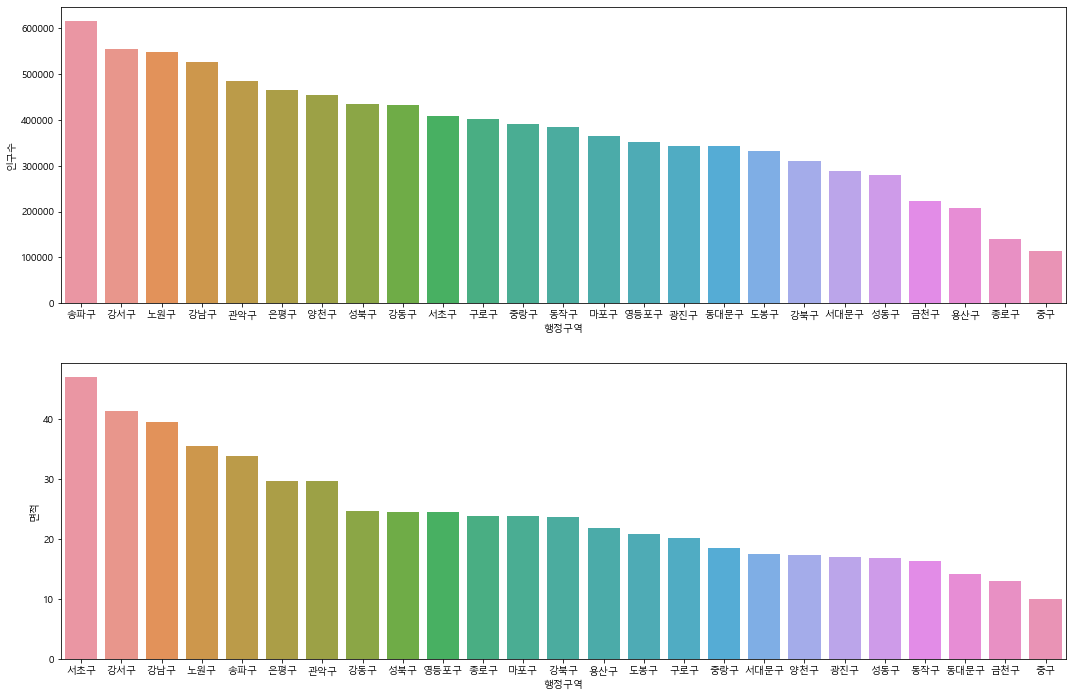

In [68]:
figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)

sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [73]:
def show_barplot(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1)
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

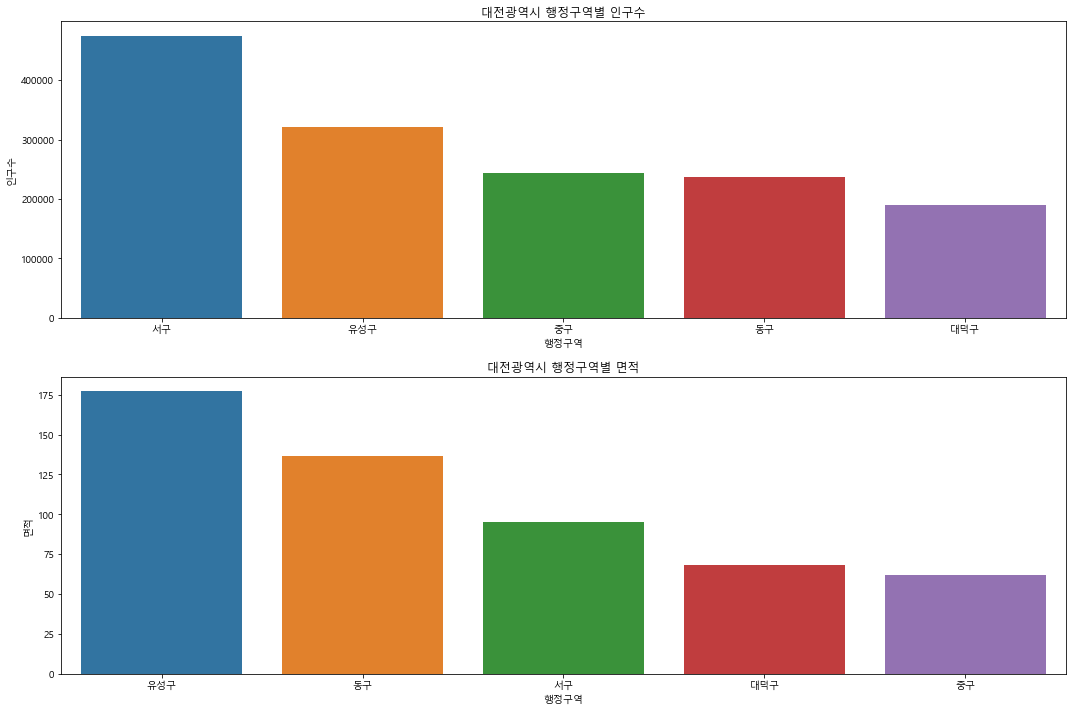

In [72]:
show_barplot('대전광역시')

<AxesSubplot:xlabel='광역시도', ylabel='인구수'>

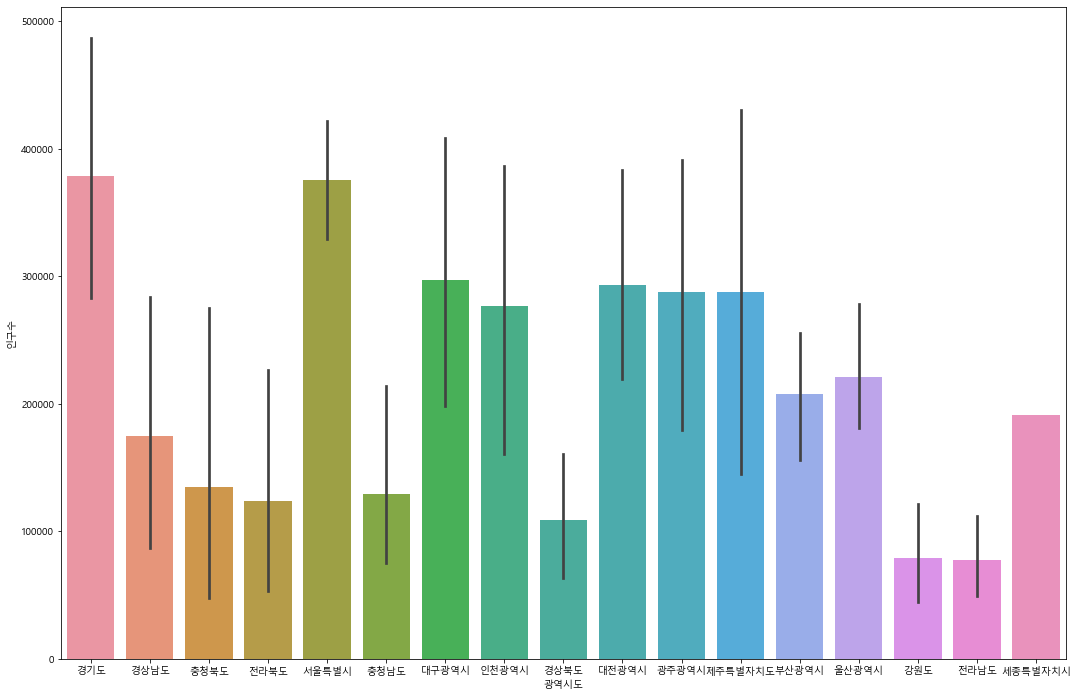

In [75]:
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(x='광역시도',y='인구수', data=data.sort_values(by='인구수',ascending=False), ax=axes1)

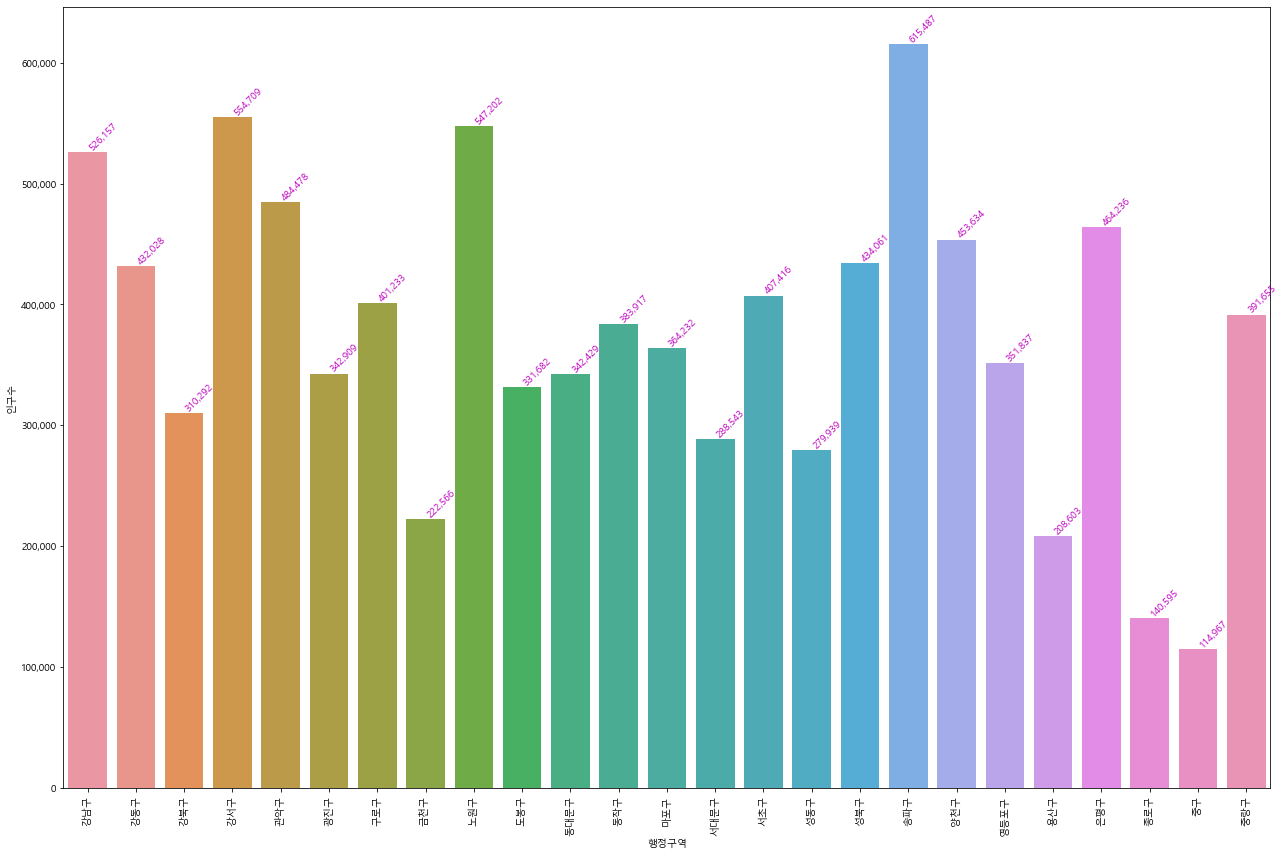

In [78]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1)

ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.set(ylabel='인구수')
for item in ax1.get_xticklabels(): 
    item.set_rotation(90)
    
for i, v in enumerate(seoul_df["인구수"].iteritems()):        
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()